<a href="https://colab.research.google.com/github/rusinqueb95/Project1-ComparativeAnalysis/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#Step 1: Initial Imports
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [65]:
# Define the list of tickers
tickers = ['NVDA', 'AAPL', 'AMZN', 'TSLA']


In [66]:
# Fetch data for each ticker and calculate daily returns
data = {}
returns = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)
    hist = stock.history(period="1y")
    data[ticker] = hist
    data[ticker]['Daily Return'] = data[ticker]['Close'].pct_change()

In [67]:
# Display data for Nvidia
print(data['NVDA'].head())

                                Open       High        Low      Close  \
Date                                                                    
2023-07-17 00:00:00-04:00  46.275148  46.482083  45.248455  46.447094   
2023-07-18 00:00:00-04:00  46.687024  47.881666  45.720314  47.479786   
2023-07-19 00:00:00-04:00  47.449797  47.803691  46.728013  47.062912   
2023-07-20 00:00:00-04:00  46.493078  47.072907  45.048511  45.506374   
2023-07-21 00:00:00-04:00  45.774292  45.852271  44.086797  44.295734   

                              Volume  Dividends  Stock Splits  Daily Return  
Date                                                                         
2023-07-17 00:00:00-04:00  510488000        0.0           0.0           NaN  
2023-07-18 00:00:00-04:00  569164000        0.0           0.0      0.022234  
2023-07-19 00:00:00-04:00  427502000        0.0           0.0     -0.008780  
2023-07-20 00:00:00-04:00  537865000        0.0           0.0     -0.033074  
2023-07-21 00:00:00-

In [68]:
# Display data for Apple
print(data['AAPL'].head())

                                 Open        High         Low       Close  \
Date                                                                        
2023-07-17 00:00:00-04:00  190.886239  193.293468  190.796718  192.965210   
2023-07-18 00:00:00-04:00  192.328591  193.303410  191.403496  192.706573   
2023-07-19 00:00:00-04:00  192.079901  197.182791  191.632267  194.069336   
2023-07-20 00:00:00-04:00  194.059378  195.432093  191.483065  192.109741   
2023-07-21 00:00:00-04:00  193.074649  193.940048  190.219800  190.926056   

                             Volume  Dividends  Stock Splits  Daily Return  
Date                                                                        
2023-07-17 00:00:00-04:00  50520200        0.0           0.0           NaN  
2023-07-18 00:00:00-04:00  48353800        0.0           0.0     -0.001340  
2023-07-19 00:00:00-04:00  80507300        0.0           0.0      0.007072  
2023-07-20 00:00:00-04:00  59581200        0.0           0.0     -0.010097 

In [69]:
# Display data for Amazon
print(data['AMZN'].head())

                                 Open        High         Low       Close  \
Date                                                                        
2023-07-17 00:00:00-04:00  134.559998  135.619995  133.210007  133.559998   
2023-07-18 00:00:00-04:00  132.710007  133.860001  131.350006  132.830002   
2023-07-19 00:00:00-04:00  133.389999  135.990005  132.529999  135.360001   
2023-07-20 00:00:00-04:00  134.070007  134.789993  129.330002  129.960007   
2023-07-21 00:00:00-04:00  131.339996  131.369995  128.419998  130.000000   

                              Volume  Dividends  Stock Splits  Daily Return  
Date                                                                         
2023-07-17 00:00:00-04:00   48450200        0.0           0.0           NaN  
2023-07-18 00:00:00-04:00   54969100        0.0           0.0     -0.005466  
2023-07-19 00:00:00-04:00   54531000        0.0           0.0      0.019047  
2023-07-20 00:00:00-04:00   59820600        0.0           0.0     -0.0

In [70]:
# Display data for Tesla
print(data['TSLA'].head())

                                 Open        High         Low       Close  \
Date                                                                        
2023-07-17 00:00:00-04:00  286.630005  292.230011  283.570007  290.380005   
2023-07-18 00:00:00-04:00  290.149994  295.260010  286.010010  293.339996   
2023-07-19 00:00:00-04:00  296.040009  299.290009  289.519989  291.260010   
2023-07-20 00:00:00-04:00  279.559998  280.929993  261.200012  262.899994   
2023-07-21 00:00:00-04:00  268.000000  268.000000  255.800003  260.019989   

                              Volume  Dividends  Stock Splits  Daily Return  
Date                                                                         
2023-07-17 00:00:00-04:00  131569600        0.0           0.0           NaN  
2023-07-18 00:00:00-04:00  112434700        0.0           0.0      0.010194  
2023-07-19 00:00:00-04:00  142355400        0.0           0.0     -0.007091  
2023-07-20 00:00:00-04:00  175158300        0.0           0.0     -0.0

In [71]:
# Save data with daily returns to CSV
for ticker in tickers:
    data[ticker].to_csv(f'{ticker}_historical_data_with_returns.csv')

In [ ]:
#The Following data will allow us to see the returns of Nvidia, Apple, Amazon and Tesla, to compare over the past year, helping us answer Research question 1: How do the returns of each compare over the past year?

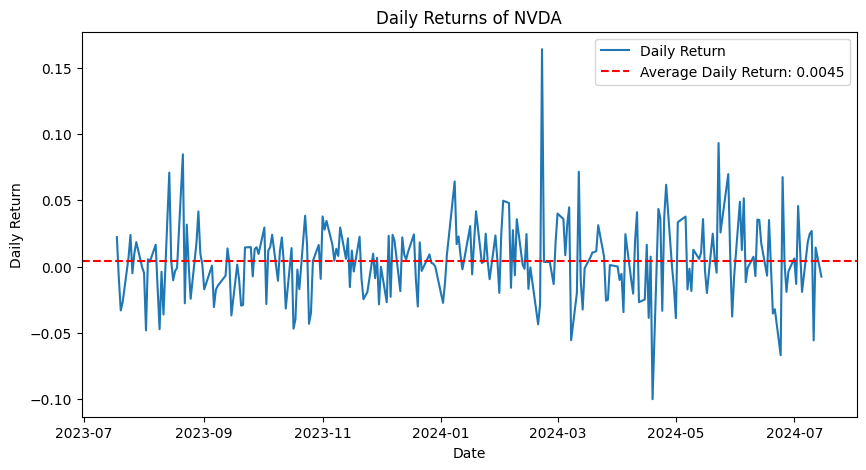

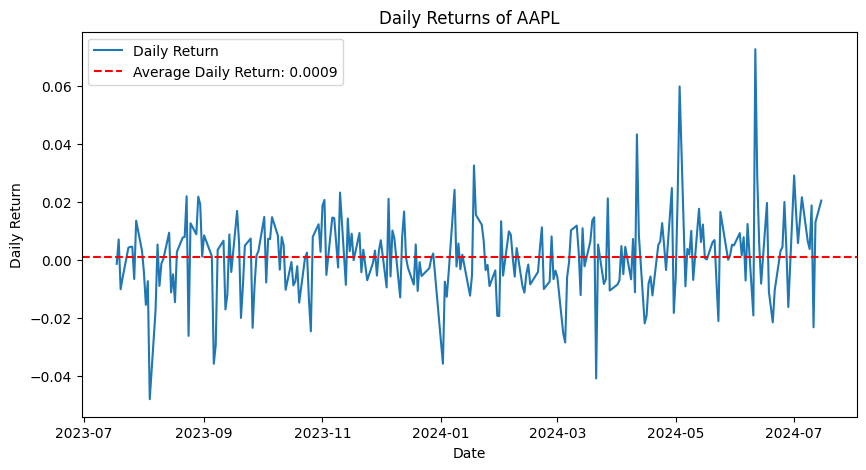

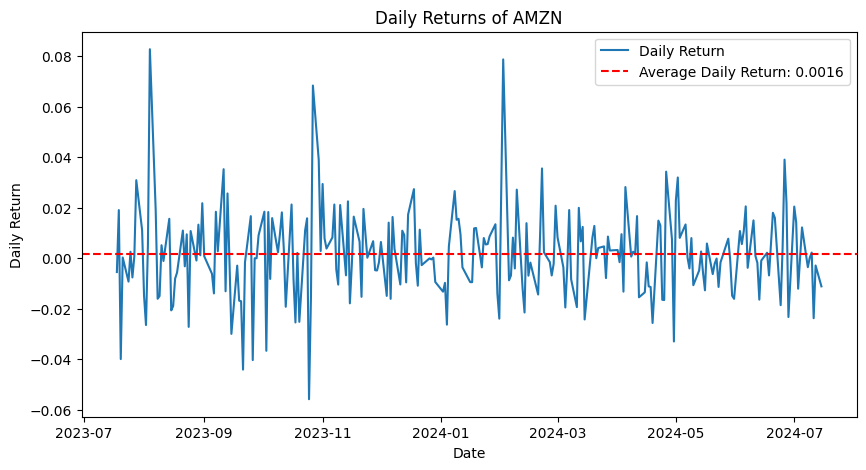

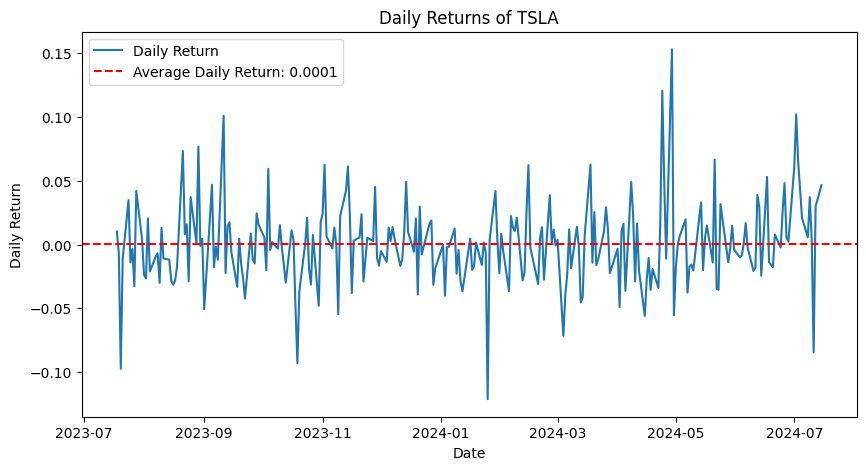

In [72]:
# Visualization of Daily Returns for Each Stock
for ticker in tickers:
    avg_daily_return = data[ticker]['Daily Return'].mean()

    plt.figure(figsize=(10, 5))
    plt.plot(data[ticker]['Daily Return'], label='Daily Return')
    plt.axhline(avg_daily_return, color='r', linestyle='--', label=f'Average Daily Return: {avg_daily_return:.4f}')
    plt.title(f'Daily Returns of {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.show()

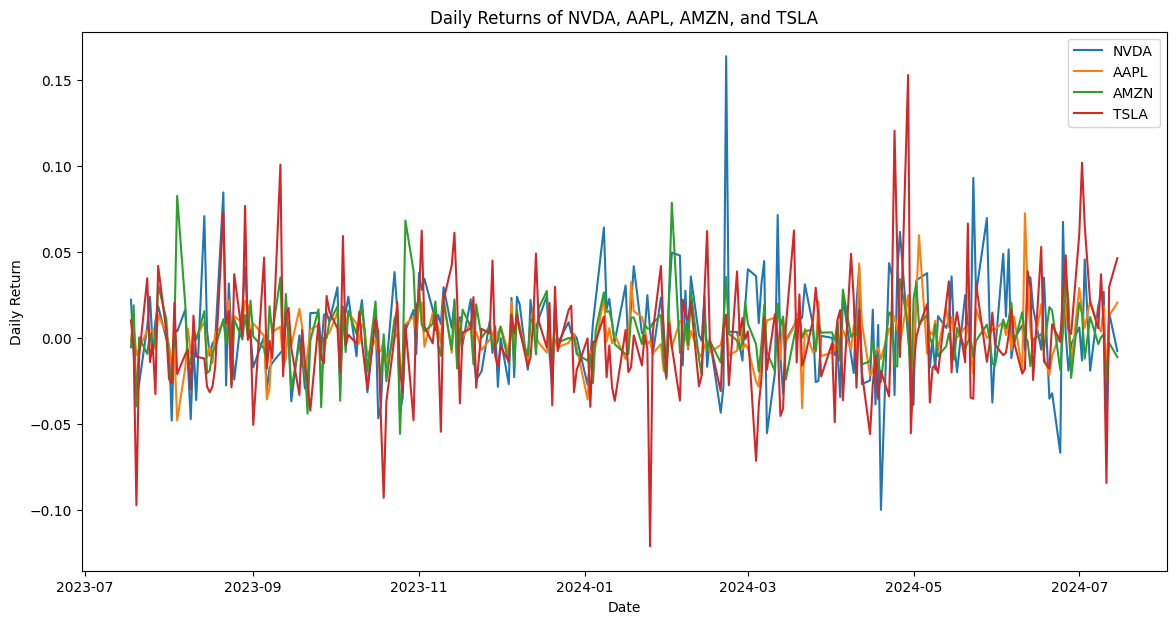

In [73]:
# Plot daily returns
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data[ticker]['Daily Return'], label=ticker)

plt.title('Daily Returns of NVDA, AAPL, AMZN, and TSLA')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


In [74]:
#Aggregation Analysis - This allows us to calculate summary statistics such as mean, standard deviation and percentiles for daily returns
# Summary statistics
summary_stats = {}
for ticker in tickers:
    summary_stats[ticker] = data[ticker]['Daily Return'].describe()

# Print summary statistics
for ticker, stats in summary_stats.items():
    print(f'Summary statistics for {ticker}:')
    print(stats)
    print()


Summary statistics for NVDA:
count    250.000000
mean       0.004476
std        0.028706
min       -0.100046
25%       -0.012271
50%        0.003931
75%        0.020916
max        0.164009
Name: Daily Return, dtype: float64

Summary statistics for AAPL:
count    250.000000
mean       0.000892
std        0.014123
min       -0.048020
25%       -0.007376
50%        0.001552
75%        0.007957
max        0.072649
Name: Daily Return, dtype: float64

Summary statistics for AMZN:
count    250.000000
mean       0.001611
std        0.017518
min       -0.055772
25%       -0.009349
50%        0.000331
75%        0.011260
max        0.082693
Name: Daily Return, dtype: float64

Summary statistics for TSLA:
count    250.000000
mean       0.000096
std        0.033128
min       -0.121253
25%       -0.019141
50%       -0.000940
75%        0.015492
max        0.153069
Name: Daily Return, dtype: float64



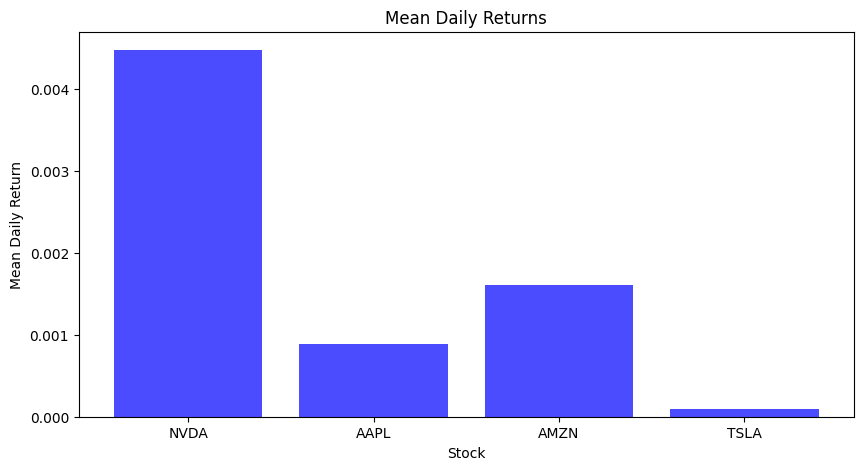

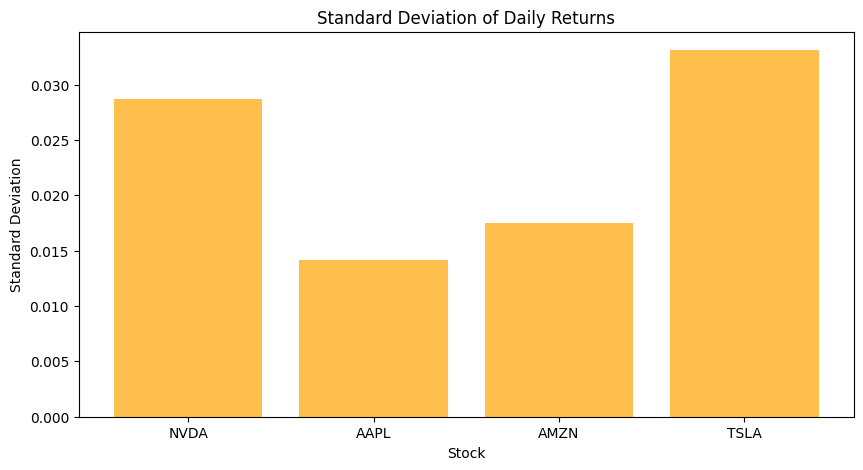

In [75]:
#Bar plot for Mean and Standard Deviation
# Extracting mean and standard deviation for each stock
mean_returns = {ticker: data[ticker]['Daily Return'].mean() for ticker in tickers}
std_returns = {ticker: data[ticker]['Daily Return'].std() for ticker in tickers}

# Creating a bar plot for mean returns
plt.figure(figsize=(10, 5))
plt.bar(mean_returns.keys(), mean_returns.values(), color='blue', alpha=0.7)
plt.title('Mean Daily Returns')
plt.xlabel('Stock')
plt.ylabel('Mean Daily Return')
plt.show()

# Creating a bar plot for standard deviation of returns
plt.figure(figsize=(10, 5))
plt.bar(std_returns.keys(), std_returns.values(), color='orange', alpha=0.7)
plt.title('Standard Deviation of Daily Returns')
plt.xlabel('Stock')
plt.ylabel('Standard Deviation')
plt.show()

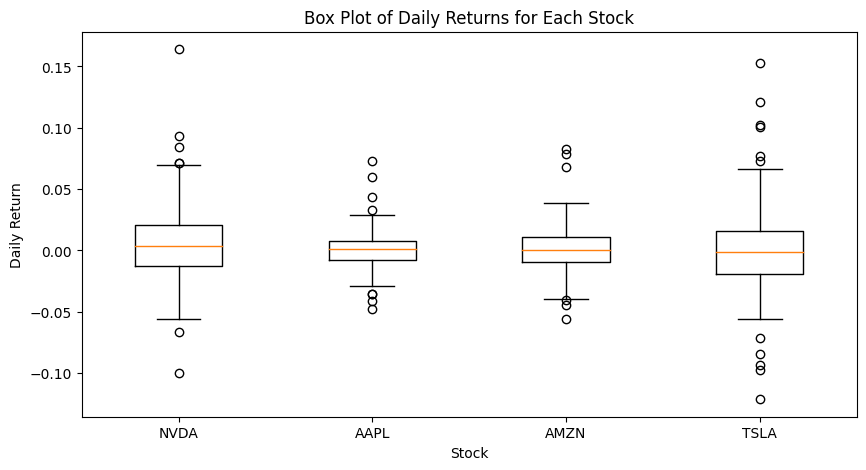

In [76]:
#Box Plot of Daily Returns
plt.figure(figsize=(10, 5))
plt.boxplot([data[ticker]['Daily Return'].dropna() for ticker in tickers], labels=tickers)
plt.title('Box Plot of Daily Returns for Each Stock')
plt.xlabel('Stock')
plt.ylabel('Daily Return')
plt.show()

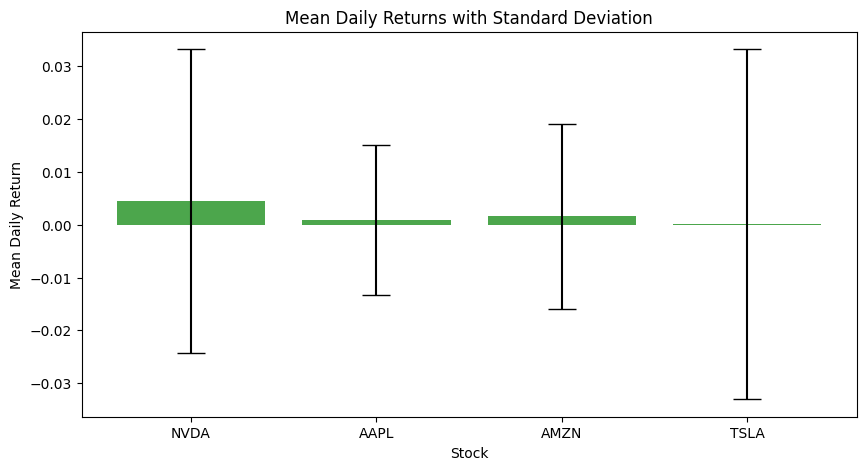

In [77]:
#Combined Visualizations of mean and Standard deviation

# Extracting mean and standard deviation for each stock
mean_returns = [data[ticker]['Daily Return'].mean() for ticker in tickers]
std_returns = [data[ticker]['Daily Return'].std() for ticker in tickers]

# Creating an error bar plot for mean returns with standard deviation
plt.figure(figsize=(10, 5))
x = np.arange(len(tickers))
plt.bar(x, mean_returns, yerr=std_returns, align='center', alpha=0.7, capsize=10, color='green')
plt.xticks(x, tickers)
plt.title('Mean Daily Returns with Standard Deviation')
plt.xlabel('Stock')
plt.ylabel('Mean Daily Return')
plt.show()

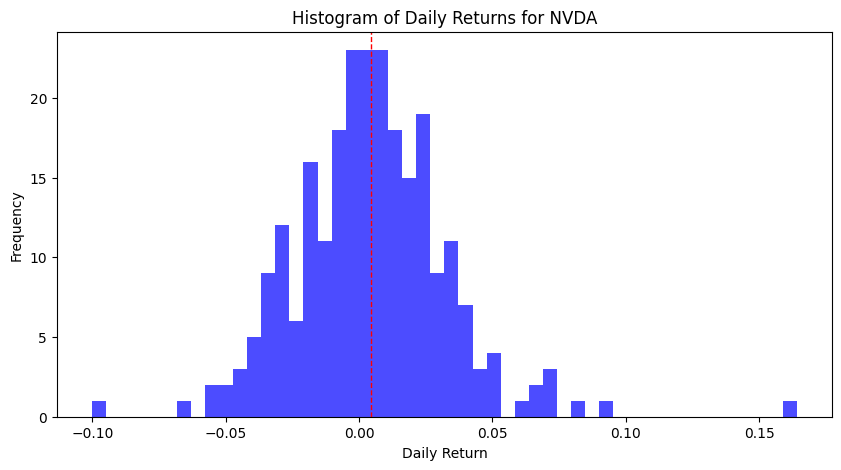

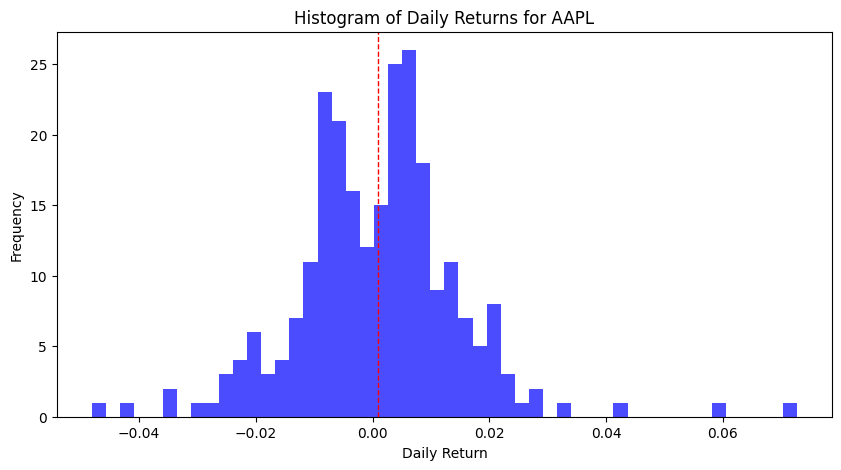

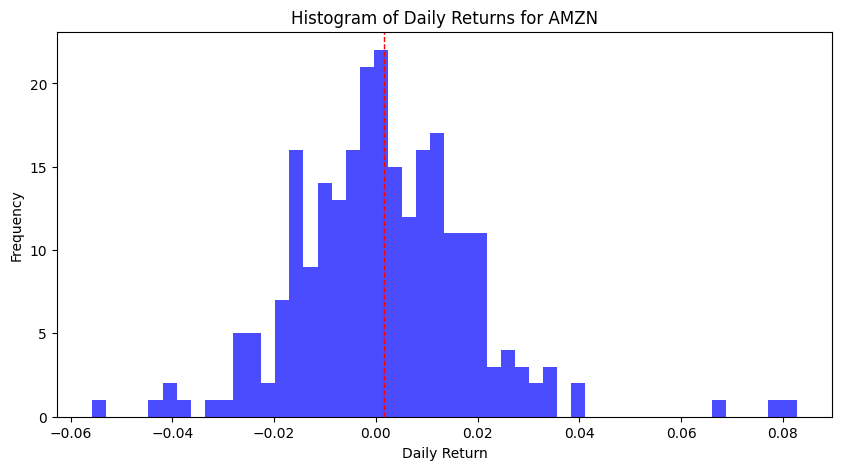

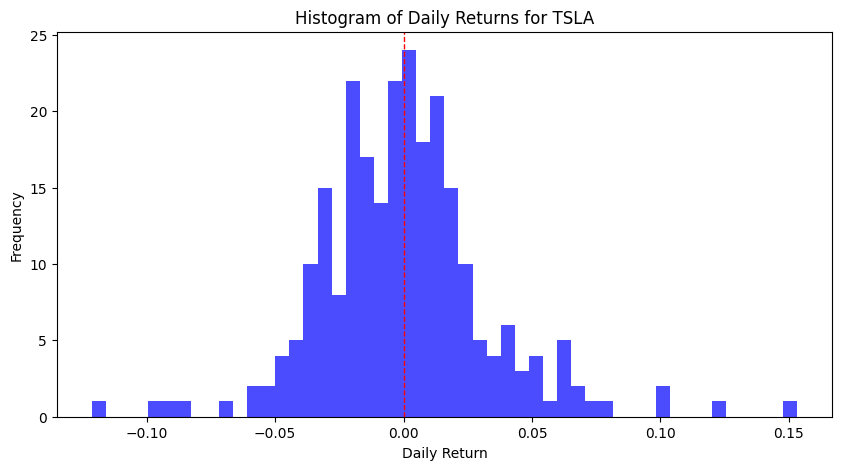

In [55]:
#Histograms of daily returns - A histogram can help you understand the distribution of daily returns for each stock.
for ticker in tickers:
    plt.figure(figsize=(10, 5))
    plt.hist(data[ticker]['Daily Return'].dropna(), bins=50, alpha=0.7, color='blue')
    plt.axvline(data[ticker]['Daily Return'].mean(), color='r', linestyle='dashed', linewidth=1)
    plt.title(f'Histogram of Daily Returns for {ticker}')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.show()

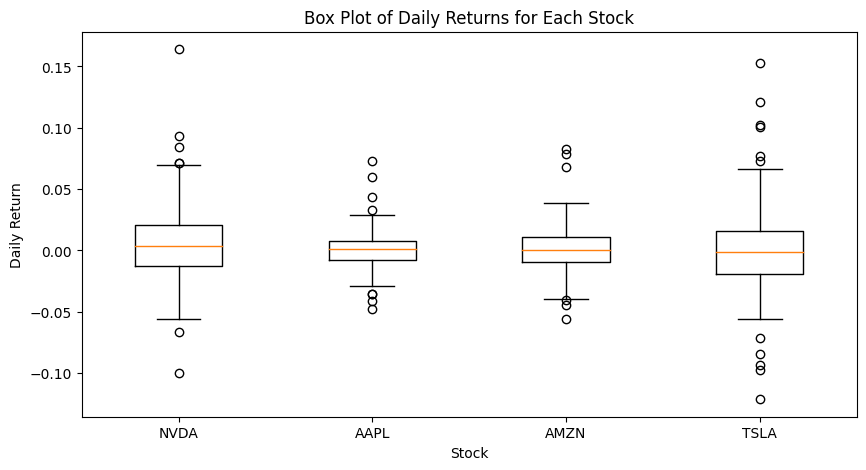

In [56]:
#Box plot of daily returns - A box plot can show the spread and outliers in daily returns.
plt.figure(figsize=(10, 5))
plt.boxplot([data[ticker]['Daily Return'].dropna() for ticker in tickers], labels=tickers)
plt.title('Box Plot of Daily Returns for Each Stock')
plt.xlabel('Stock')
plt.ylabel('Daily Return')
plt.show()

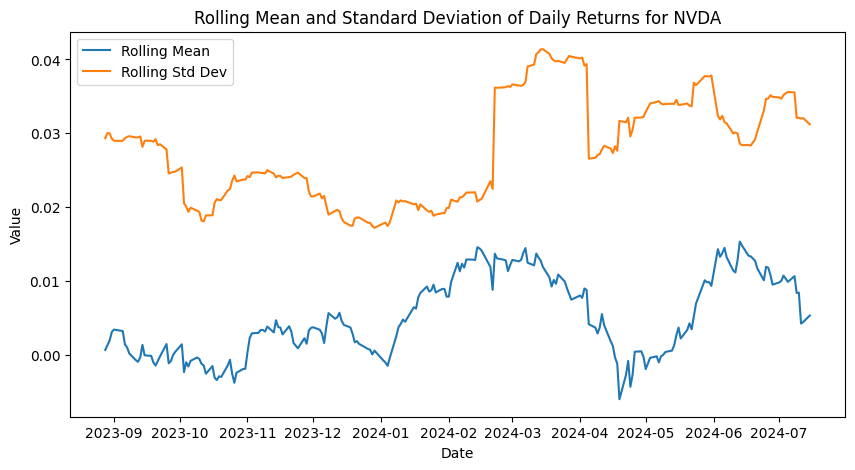

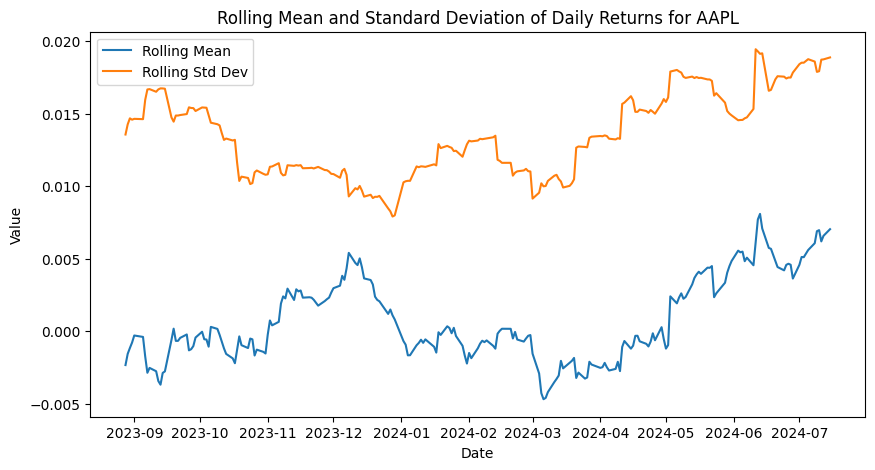

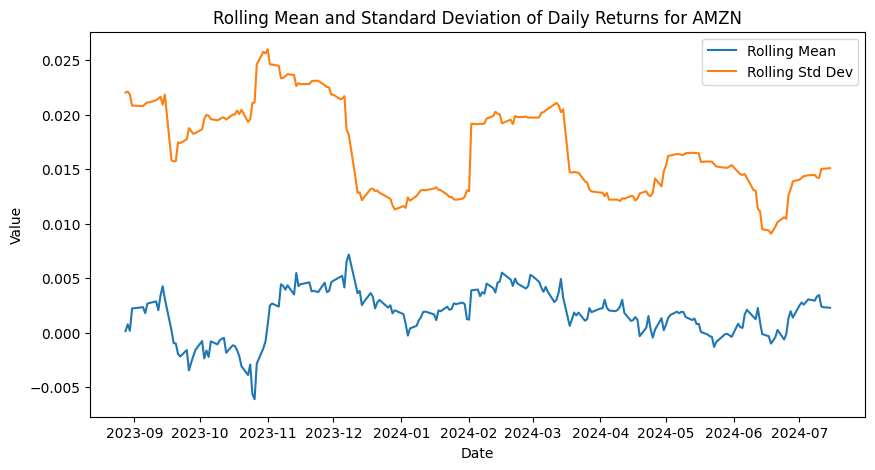

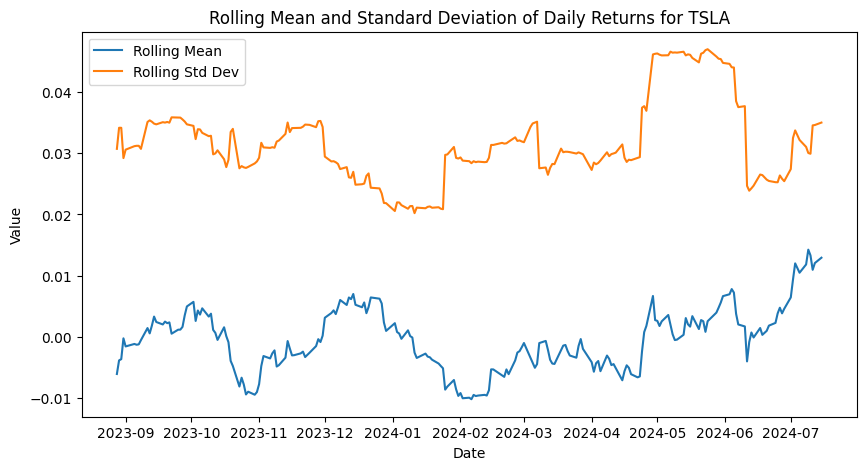

In [57]:
#Rolling Mean and Standard Deviation - Rolling statistics can help you understand the changing volatility and average returns over time.
window_size = 30  # 30-day rolling window

for ticker in tickers:
    plt.figure(figsize=(10, 5))
    rolling_mean = data[ticker]['Daily Return'].rolling(window=window_size).mean()
    rolling_std = data[ticker]['Daily Return'].rolling(window=window_size).std()

    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label='Rolling Std Dev')
    plt.title(f'Rolling Mean and Standard Deviation of Daily Returns for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

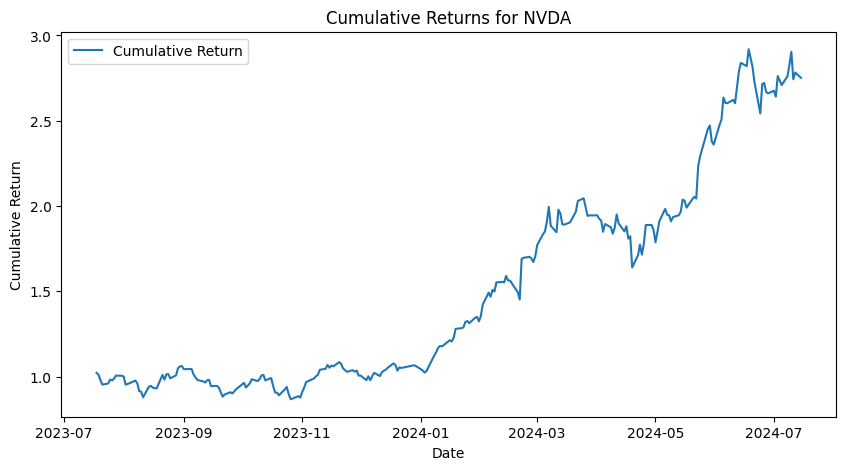

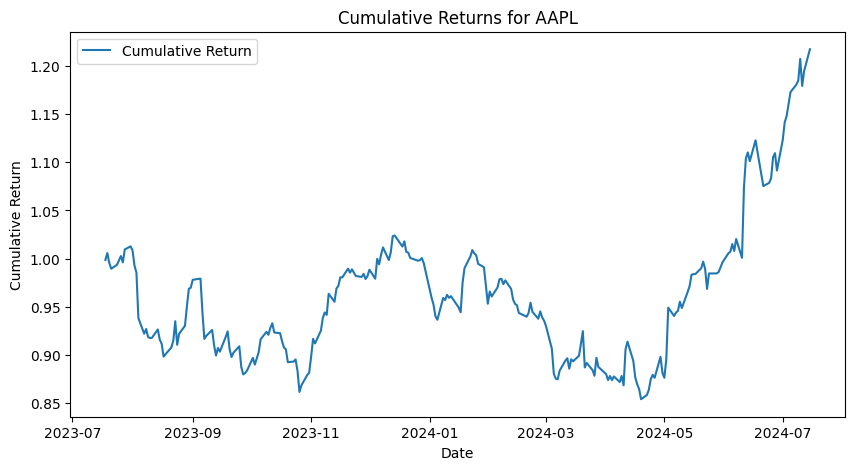

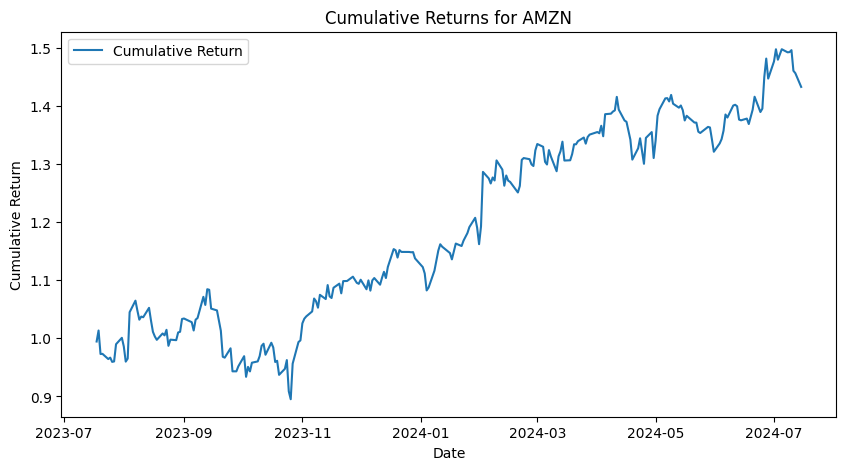

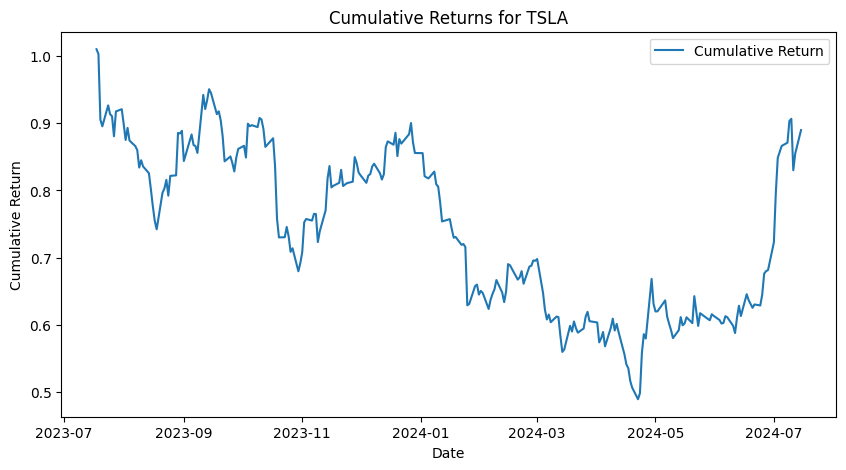

In [58]:
#Cumulative Returns - Cumulative returns show how the investment grows over time if you held the stock for the entire period.
for ticker in tickers:
    data[ticker]['Cumulative Return'] = (1 + data[ticker]['Daily Return']).cumprod()

    plt.figure(figsize=(10, 5))
    plt.plot(data[ticker]['Cumulative Return'], label='Cumulative Return')
    plt.title(f'Cumulative Returns for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.show()

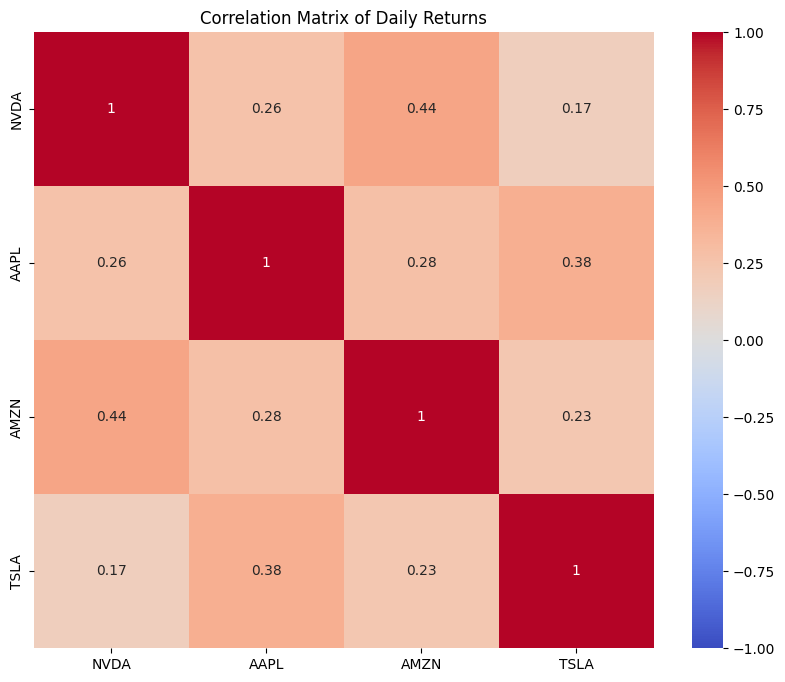

In [79]:
#Heatmap of daily returns correlation - A heatmap can visualize the correlation between the daily returns of multiple stocks.
# Combine daily returns into a single DataFrame
returns_df = pd.DataFrame({ticker: data[ticker]['Daily Return'] for ticker in tickers})

# Calculate the correlation matrix
correlation_matrix = returns_df.corr()

# Heatmap of the correlation matrix - A heatmap can visualize the correlation between the daily returns of multiple stocks.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Daily Returns')
plt.show()


In [78]:
#Correlation Analysis - This will help us calculate the correlation between the daily returns of each stock
# Combine daily returns into a single DataFrame
returns_df = pd.DataFrame({ticker: data[ticker]['Daily Return'] for ticker in tickers})

# Calculate the correlation matrix
correlation_matrix = returns_df.corr()

# Print the correlation matrix
print('Correlation Matrix:')
print(correlation_matrix)

Correlation Matrix:
          NVDA      AAPL      AMZN      TSLA
NVDA  1.000000  0.261818  0.441354  0.171778
AAPL  0.261818  1.000000  0.275706  0.383582
AMZN  0.441354  0.275706  1.000000  0.232205
TSLA  0.171778  0.383582  0.232205  1.000000


In [ ]:
#Comparison Statistical Analysis Techinque

In [80]:
# Calculate cumulative returns
for ticker in tickers:
    data[ticker]['Cumulative Return'] = (1 + data[ticker]['Daily Return']).cumprod()

# Display data for Nvidia to check
print(data['NVDA'].head())

                                Open       High        Low      Close  \
Date                                                                    
2023-07-17 00:00:00-04:00  46.275148  46.482083  45.248455  46.447094   
2023-07-18 00:00:00-04:00  46.687024  47.881666  45.720314  47.479786   
2023-07-19 00:00:00-04:00  47.449797  47.803691  46.728013  47.062912   
2023-07-20 00:00:00-04:00  46.493078  47.072907  45.048511  45.506374   
2023-07-21 00:00:00-04:00  45.774292  45.852271  44.086797  44.295734   

                              Volume  Dividends  Stock Splits  Daily Return  \
Date                                                                          
2023-07-17 00:00:00-04:00  510488000        0.0           0.0           NaN   
2023-07-18 00:00:00-04:00  569164000        0.0           0.0      0.022234   
2023-07-19 00:00:00-04:00  427502000        0.0           0.0     -0.008780   
2023-07-20 00:00:00-04:00  537865000        0.0           0.0     -0.033074   
2023-07-21 00:

In [81]:
# Calculate cumulative returns
for ticker in tickers:
    data[ticker]['Cumulative Return'] = (1 + data[ticker]['Daily Return']).cumprod()

# Display data for Apple to check
print(data['AAPL'].head())

                                 Open        High         Low       Close  \
Date                                                                        
2023-07-17 00:00:00-04:00  190.886239  193.293468  190.796718  192.965210   
2023-07-18 00:00:00-04:00  192.328591  193.303410  191.403496  192.706573   
2023-07-19 00:00:00-04:00  192.079901  197.182791  191.632267  194.069336   
2023-07-20 00:00:00-04:00  194.059378  195.432093  191.483065  192.109741   
2023-07-21 00:00:00-04:00  193.074649  193.940048  190.219800  190.926056   

                             Volume  Dividends  Stock Splits  Daily Return  \
Date                                                                         
2023-07-17 00:00:00-04:00  50520200        0.0           0.0           NaN   
2023-07-18 00:00:00-04:00  48353800        0.0           0.0     -0.001340   
2023-07-19 00:00:00-04:00  80507300        0.0           0.0      0.007072   
2023-07-20 00:00:00-04:00  59581200        0.0           0.0     -0.01

In [82]:
# Calculate cumulative returns
for ticker in tickers:
    data[ticker]['Cumulative Return'] = (1 + data[ticker]['Daily Return']).cumprod()

# Display data for Amazon to check
print(data['AMZN'].head())

                                 Open        High         Low       Close  \
Date                                                                        
2023-07-17 00:00:00-04:00  134.559998  135.619995  133.210007  133.559998   
2023-07-18 00:00:00-04:00  132.710007  133.860001  131.350006  132.830002   
2023-07-19 00:00:00-04:00  133.389999  135.990005  132.529999  135.360001   
2023-07-20 00:00:00-04:00  134.070007  134.789993  129.330002  129.960007   
2023-07-21 00:00:00-04:00  131.339996  131.369995  128.419998  130.000000   

                              Volume  Dividends  Stock Splits  Daily Return  \
Date                                                                          
2023-07-17 00:00:00-04:00   48450200        0.0           0.0           NaN   
2023-07-18 00:00:00-04:00   54969100        0.0           0.0     -0.005466   
2023-07-19 00:00:00-04:00   54531000        0.0           0.0      0.019047   
2023-07-20 00:00:00-04:00   59820600        0.0           0.0    

In [83]:
# Calculate cumulative returns
for ticker in tickers:
    data[ticker]['Cumulative Return'] = (1 + data[ticker]['Daily Return']).cumprod()

# Display data for Tesla to check
print(data['TSLA'].head())

                                 Open        High         Low       Close  \
Date                                                                        
2023-07-17 00:00:00-04:00  286.630005  292.230011  283.570007  290.380005   
2023-07-18 00:00:00-04:00  290.149994  295.260010  286.010010  293.339996   
2023-07-19 00:00:00-04:00  296.040009  299.290009  289.519989  291.260010   
2023-07-20 00:00:00-04:00  279.559998  280.929993  261.200012  262.899994   
2023-07-21 00:00:00-04:00  268.000000  268.000000  255.800003  260.019989   

                              Volume  Dividends  Stock Splits  Daily Return  \
Date                                                                          
2023-07-17 00:00:00-04:00  131569600        0.0           0.0           NaN   
2023-07-18 00:00:00-04:00  112434700        0.0           0.0      0.010194   
2023-07-19 00:00:00-04:00  142355400        0.0           0.0     -0.007091   
2023-07-20 00:00:00-04:00  175158300        0.0           0.0    

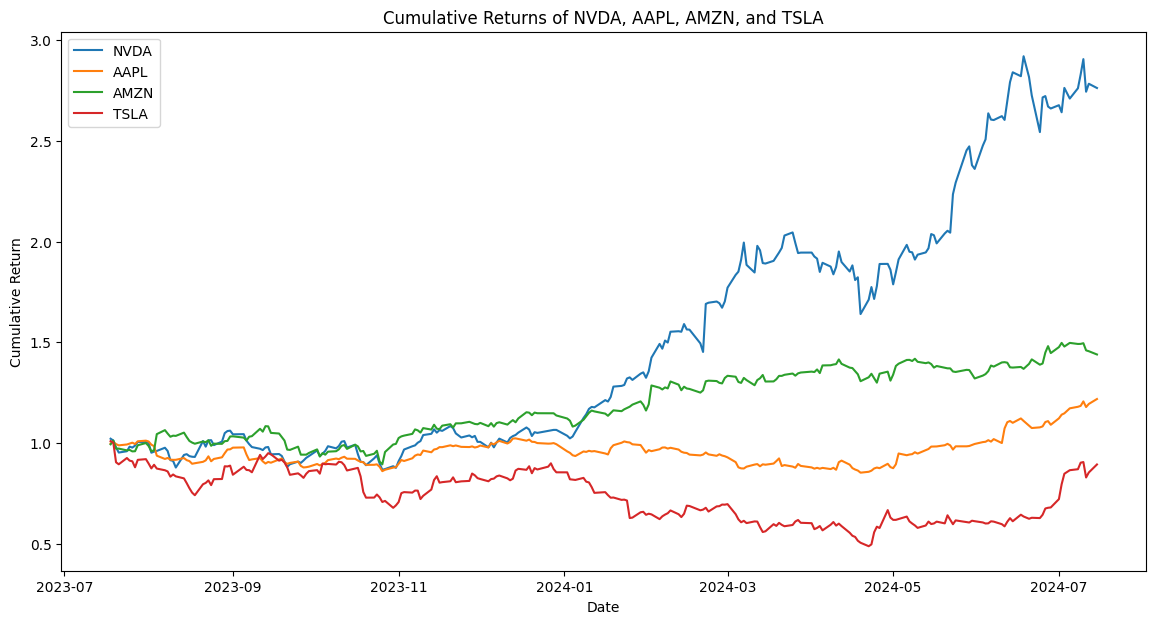

In [84]:
#Visualizing the cumuluative returns
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data[ticker]['Cumulative Return'], label=ticker)

plt.title('Cumulative Returns of NVDA, AAPL, AMZN, and TSLA')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

In [86]:
#Summary Statistics
# Summary statistics for cumulative returns
summary_stats_cumulative = {}
for ticker in tickers:
    summary_stats_cumulative[ticker] = data[ticker]['Cumulative Return'].describe()

# Print summary statistics
for ticker, stats in summary_stats_cumulative.items():
    print(f'Summary statistics for cumulative returns of {ticker}:')
    print(stats)
    print()

Summary statistics for cumulative returns of NVDA:
count    250.000000
mean       1.496391
std        0.603115
min        0.868025
25%        0.990900
50%        1.193408
75%        1.911233
max        2.919020
Name: Cumulative Return, dtype: float64

Summary statistics for cumulative returns of AAPL:
count    250.000000
mean       0.959297
std        0.071311
min        0.853918
25%        0.905861
50%        0.949763
75%        0.993931
max        1.220323
Name: Cumulative Return, dtype: float64

Summary statistics for cumulative returns of AMZN:
count    250.000000
mean       1.188841
std        0.168597
min        0.895253
25%        1.033861
50%        1.152703
75%        1.345369
max        1.497454
Name: Cumulative Return, dtype: float64

Summary statistics for cumulative returns of TSLA:
count    250.000000
mean       0.740777
std        0.122458
min        0.489187
25%        0.619860
50%        0.742200
75%        0.850343
max        1.010194
Name: Cumulative Return, dtype: f

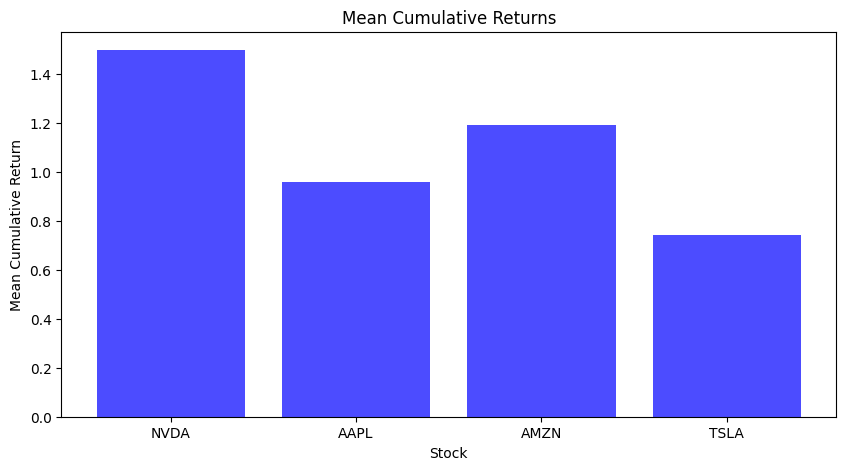

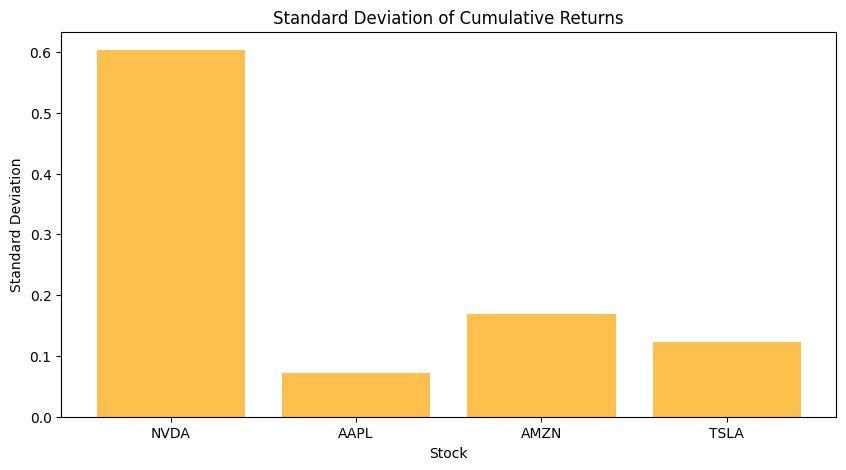

In [87]:
#Visualizations for summary Statistics
# Extracting mean and standard deviation for cumulative returns
mean_cumulative_returns = {ticker: data[ticker]['Cumulative Return'].mean() for ticker in tickers}
std_cumulative_returns = {ticker: data[ticker]['Cumulative Return'].std() for ticker in tickers}

# Creating a bar plot for mean cumulative returns
plt.figure(figsize=(10, 5))
plt.bar(mean_cumulative_returns.keys(), mean_cumulative_returns.values(), color='blue', alpha=0.7)
plt.title('Mean Cumulative Returns')
plt.xlabel('Stock')
plt.ylabel('Mean Cumulative Return')
plt.show()

# Creating a bar plot for standard deviation of cumulative returns
plt.figure(figsize=(10, 5))
plt.bar(std_cumulative_returns.keys(), std_cumulative_returns.values(), color='orange', alpha=0.7)
plt.title('Standard Deviation of Cumulative Returns')
plt.xlabel('Stock')
plt.ylabel('Standard Deviation')
plt.show()

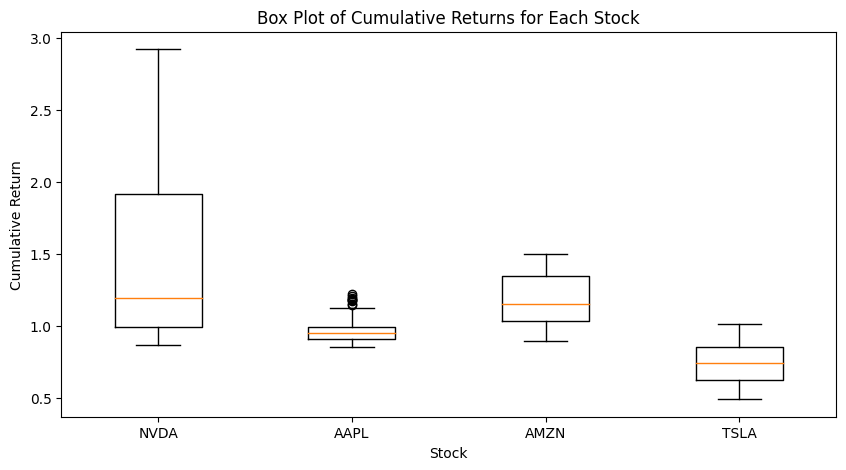

In [88]:
#Box plot Summary Visualization Statistics
plt.figure(figsize=(10, 5))
plt.boxplot([data[ticker]['Cumulative Return'].dropna() for ticker in tickers], labels=tickers)
plt.title('Box Plot of Cumulative Returns for Each Stock')
plt.xlabel('Stock')
plt.ylabel('Cumulative Return')
plt.show()


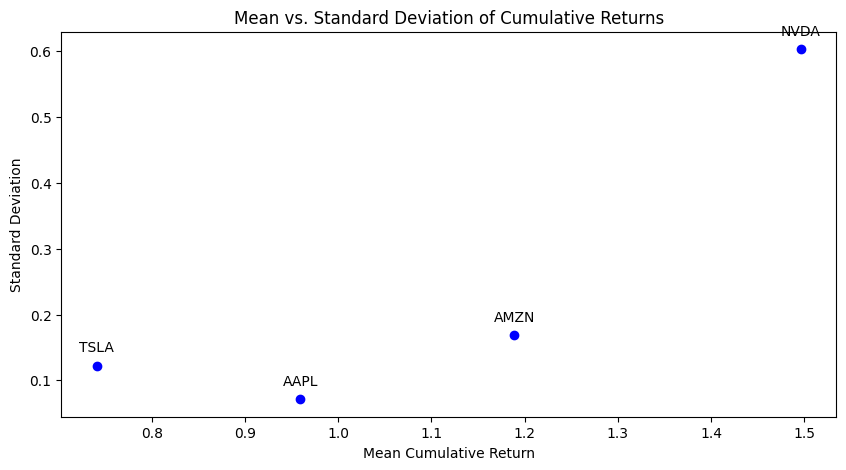

In [91]:
#Scatter Plot of Mean vs. Standard Deviation Summary Visualization
mean_cumulative_returns = {ticker: data[ticker]['Cumulative Return'].mean() for ticker in tickers}
std_cumulative_returns = {ticker: data[ticker]['Cumulative Return'].std() for ticker in tickers}

plt.figure(figsize=(10, 5))
plt.scatter(mean_cumulative_returns.values(), std_cumulative_returns.values(), color='blue')
for ticker in tickers:
    plt.annotate(ticker, (mean_cumulative_returns[ticker], std_cumulative_returns[ticker]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Mean vs. Standard Deviation of Cumulative Returns')
plt.xlabel('Mean Cumulative Return')
plt.ylabel('Standard Deviation')
plt.show()

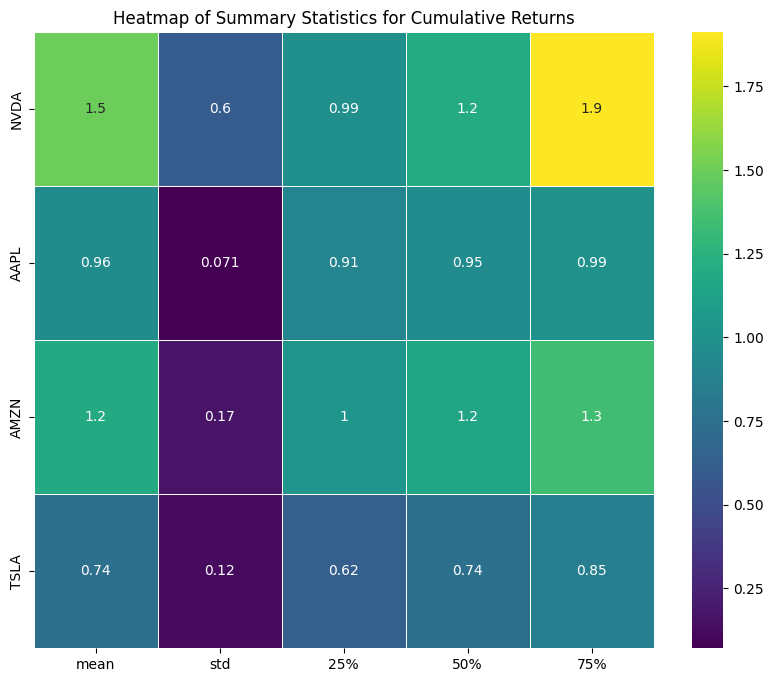

In [92]:
#5. Heatmap of Summary Statistics- heatmaps can visualize the summary statistics for each stock, showing mean, standard deviation, and other percentiles.
summary_stats_df = pd.DataFrame(summary_stats_cumulative).T

plt.figure(figsize=(10, 8))
sns.heatmap(summary_stats_df[['mean', 'std', '25%', '50%', '75%']], annot=True, cmap='viridis', linewidths=0.5)
plt.title('Heatmap of Summary Statistics for Cumulative Returns')
plt.show()

In [ ]:
#The Following will help provide answers to research question 2 - What trends and volatility differences are there amongst the 4 stocks?

In [ ]:
#Implementing Trends Analysis

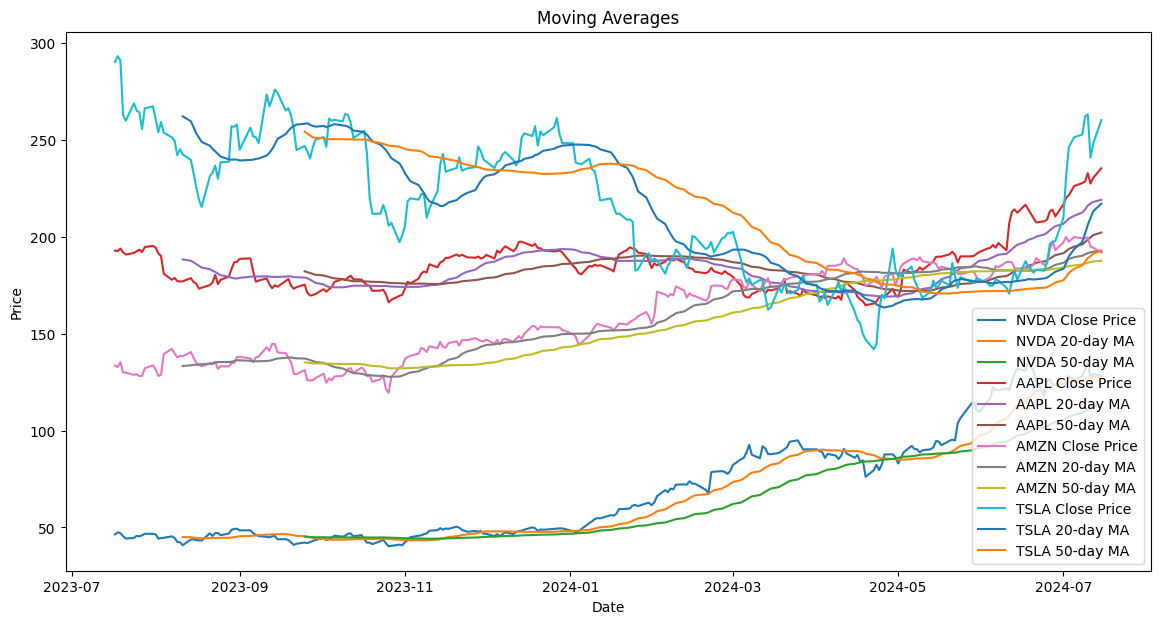

In [93]:
#Moving Averages Data
# Calculate moving averages
for ticker in tickers:
    data[ticker]['20-day MA'] = data[ticker]['Close'].rolling(window=20).mean()
    data[ticker]['50-day MA'] = data[ticker]['Close'].rolling(window=50).mean()

# Plot moving averages
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data[ticker]['Close'], label=f'{ticker} Close Price')
    plt.plot(data[ticker]['20-day MA'], label=f'{ticker} 20-day MA')
    plt.plot(data[ticker]['50-day MA'], label=f'{ticker} 50-day MA')

plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


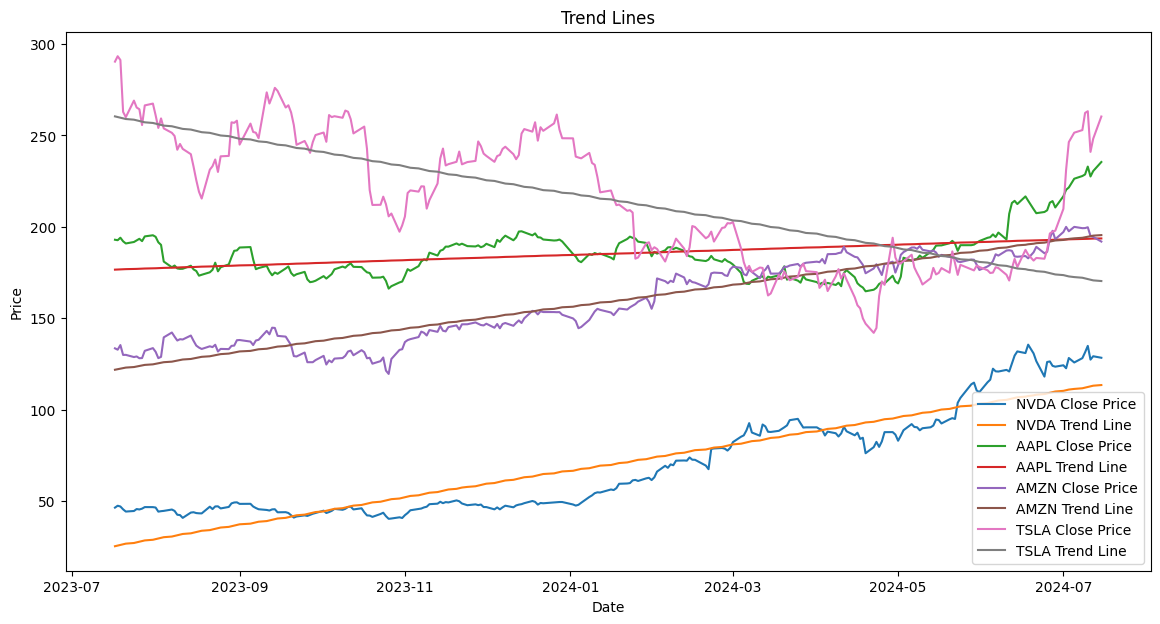

In [94]:
#Trend Lines Data - Plots trend lines to the closing prices

# Function to fit a trend line
def fit_trendline(data, col='Close'):
    x = np.arange(len(data))
    y = data[col].values
    z = np.polyfit(x, y, 1)
    trend = np.poly1d(z)
    return trend(x)

# Plot trend lines
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data[ticker]['Close'], label=f'{ticker} Close Price')
    trend = fit_trendline(data[ticker])
    plt.plot(data[ticker].index, trend, label=f'{ticker} Trend Line')

plt.title('Trend Lines')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#Implementing Volatility Analysis

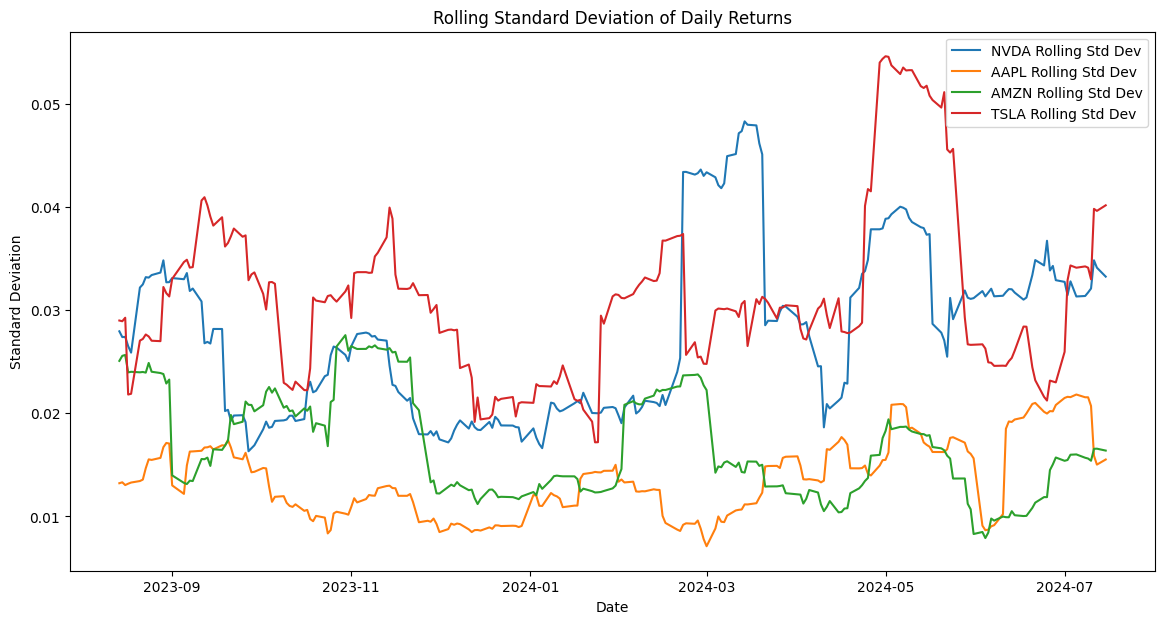

In [97]:
#Rolling Standard Deviations
# Calculate rolling standard deviation
for ticker in tickers:
    data[ticker]['Rolling Std Dev'] = data[ticker]['Daily Return'].rolling(window=20).std()

# Plot rolling standard deviation
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data[ticker]['Rolling Std Dev'], label=f'{ticker} Rolling Std Dev')

plt.title('Rolling Standard Deviation of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()

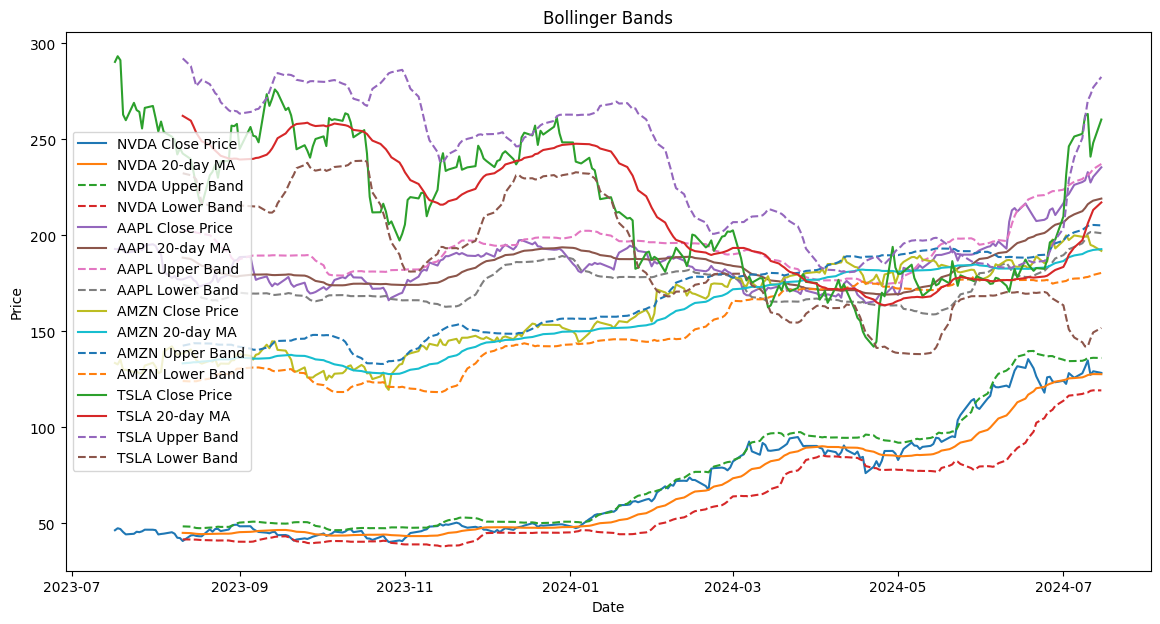

In [95]:
#Bollinger Bands
# Calculate Bollinger Bands
for ticker in tickers:
    data[ticker]['20-day MA'] = data[ticker]['Close'].rolling(window=20).mean()
    data[ticker]['20-day Std Dev'] = data[ticker]['Close'].rolling(window=20).std()
    data[ticker]['Upper Band'] = data[ticker]['20-day MA'] + (data[ticker]['20-day Std Dev'] * 2)
    data[ticker]['Lower Band'] = data[ticker]['20-day MA'] - (data[ticker]['20-day Std Dev'] * 2)

# Plot Bollinger Bands
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data[ticker]['Close'], label=f'{ticker} Close Price')
    plt.plot(data[ticker]['20-day MA'], label=f'{ticker} 20-day MA')
    plt.plot(data[ticker]['Upper Band'], label=f'{ticker} Upper Band', linestyle='--')
    plt.plot(data[ticker]['Lower Band'], label=f'{ticker} Lower Band', linestyle='--')

plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()